# Precios de Casas:

A  partir  de  la  base  de  datos  de  precios  de  casas  de  Boston ( Boston  Housing  Data
),  realiza  la regresión de los precios de las casas con las siguientes variantes:

* Usando m ́ınimos cuadrados
* Aplicando regularización por norma $l_{1}$ y $l_2$
* Expandiendo los atributos con funciones base polinomiales
* Seleccionando los atributos más importantes

Grafica el error de generalización del modelo con diferentes grados del polinomio, coeficientes de
regularización  y  n ́umero  de  atributos.  Todos  los  modelos  deber ́an  ser  evaluados  con  validación
cruzada de 10 particiones

In [14]:
                        ### Solo ejecutar una vez, para descargar el data_set###
# Se obtiene los datos de la liga que esta se encuentra de a continuación:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

# Implementacion de Funciones 

In [16]:
#Funcion MyLinearRegression la cual se baso en el código proporcionado por  @Dr. Gibran Fuentes-Pineda
def MyLinearRegression(X_train,y_train):
    # Para encontrar pesos por mínimos cuadrados, theta_ml = (XT X)-1 XT y
    # (XT X)
    XTX = np.dot(X_train.T, X_train)
    # (XT X)-1
    XTX_inv = np.linalg.inv(XTX)
    # XT y
    XTy = np.dot(X_train.T, y_train)
    #theta_ml = (XT X)-1 XT y
    theta_ml = np.dot(XTX_inv, XTy)
    return theta_ml

In [17]:
def polynomial_expansion(X, degree):
    phi_X = X
    for i in range(degree - 1):
        powerX = np.power(X, i + 2)
        phi_X = np.column_stack((phi_X, powerX))
    return phi_X

In [18]:
import numpy as np

#Se cargan los datos.
data = np.loadtxt("housing.data")

# divide aleatoriamente la base de datos en entrenamiento (80%) y validación (20%)
indices = np.random.permutation(data.shape[0])
training_idx, test_idx = indices[:int(data.shape[0]*0.8)], indices[int(data.shape[0]*0.8):]
X_train, X_test = data[training_idx,:], data[test_idx,:]

#mostrando las dimensiones que tienen el conjunto de entrenamiento y el de test
print (X_train.shape)
print (X_test.shape)

(404, 14)
(102, 14)


In [4]:
# crea matriz de diseño (agrega 1 a las entradas para la ordenada al origen)
X_train_ones_p = np.insert(X_train,0,1.0,axis=1)
X_test_ones_p = np.insert(X_test,0,1.0,axis=1)

# Se obtiene las variables que entraran al modelo
X_train_ones=X_train_ones_p[:,0:14]
X_test_ones=X_test_ones_p[:,0:14]

# Se obtienen las variables que se van a predecir.
y_train=X_train_ones_p[:,14:15]
y_test=X_test_ones_p[:,14:15]

In [5]:
#Madar a llamar a la función que implementamos.
print ("Coefficients: \n",MyLinearRegression(X_train_ones,y_train))

('Coefficients: \n', array([[  4.07020301e+01],
       [ -1.08020321e-01],
       [  3.77619059e-02],
       [  1.02932909e-02],
       [  1.68618380e+00],
       [ -1.73622503e+01],
       [  3.39604885e+00],
       [  6.85425537e-04],
       [ -1.54929974e+00],
       [  3.21062567e-01],
       [ -1.39891175e-02],
       [ -9.81540846e-01],
       [  9.22787696e-03],
       [ -5.37258513e-01]]))


# Usando sklearn:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train_ones, y_train)
y_train_hat = regr.predict(X_train_ones)
sse_train = np.square(y_train - y_train_hat).sum()
print sse_train
print('Coefficients: \n', regr.coef_)

9251.5427796
('Coefficients: \n', array([[  4.07020301e+01,  -1.08020321e-01,   3.77619059e-02,
          1.02932909e-02,   1.68618380e+00,  -1.73622503e+01,
          3.39604885e+00,   6.85425537e-04,  -1.54929974e+00,
          3.21062567e-01,  -1.39891175e-02,  -9.81540846e-01,
          9.22787696e-03,  -5.37258513e-01]]))


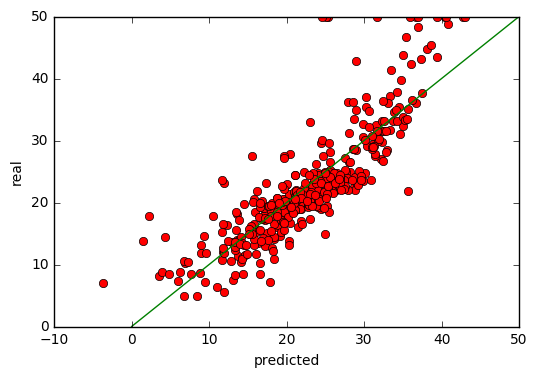

In [7]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# Plot outputs
%matplotlib inline
pl.plot(y_train_hat, y_train,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


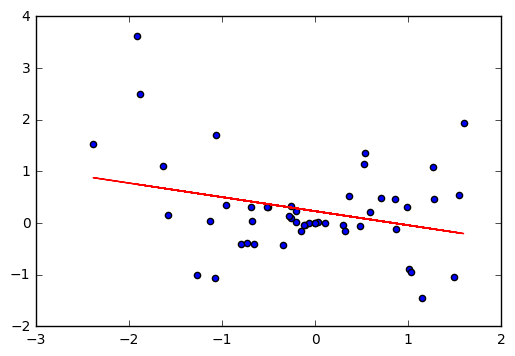

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

fig.show()

# Aplicando norma $l_{1}$

In [9]:
import numpy as np
import scipy.sparse as sp
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

clf = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, normalize=True)
lasso  = clf.fit(X_train_ones, y_train)
y_train_hat = lasso.predict(X_train_ones)
sse_train = np.square(y_train - y_train_hat).sum()

print sse_train

17380179.2248


#### Comportamiento de la norma $l_{1}$

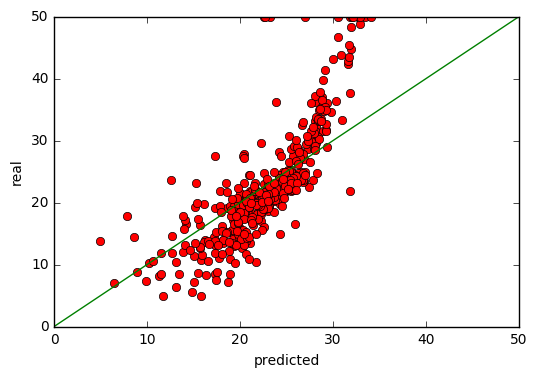

In [10]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# Plot outputs
%matplotlib inline
pl.plot(y_train_hat, y_train,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

# Aplicando norma $l_{2}$

Es usando la implementacion proporcionada por @Dr. Gibran Fuentes-Pineda

In [33]:
# Recordar que esta funcion la debemos de implementar como un modulo despues 
# de verificar si coincide los parametros estimados por este procedimiento y por el 
# de sklearn.

# Se obtiene las variables que entraran al modelo
X_train_ones=X_train_ones_p[:,0:14]
X_test_ones=X_test_ones_p[:,0:14]

# Se obtienen las variables que se van a predecir.
y_train=X_train_ones_p[:,14:15]
y_test=X_test_ones_p[:,14:15]

phi_X_train = polynomial_expansion(X_train,1)

# Tecnicamente debemos de obtener una matriz de ceros ya que el grado al que vamos a expandir es 1
#print (phi_X_train-X_train)

# crea matriz de diseño (agrega 1 a las entradas para la ordenada al origen)
phi_X_train = np.insert(phi_X_train,0,1.0,axis=1)

lambda_const = 0.01
regularizer = lambda_const * np.identity(phi_X_train.shape[1])
theta_map = np.dot(np.linalg.inv(regularizer + np.dot(np.transpose(phi_X_train), phi_X_train)),
                   np.dot(np.transpose(phi_X_train), y_train))
y_train_hat = np.dot(phi_X_train,theta_map)


print (theta_map) 
print (len(theta_map))

[[  3.88232811e-05]
 [ -1.13108899e-07]
 [  4.05775478e-08]
 [  3.00156281e-08]
 [  3.78489787e-06]
 [ -1.96277122e-05]
 [  4.99665327e-06]
 [  5.46052603e-09]
 [ -1.54017309e-06]
 [  3.14487493e-07]
 [ -1.38329581e-08]
 [ -1.17201107e-06]
 [  1.21935277e-08]
 [ -6.16277809e-07]
 [  9.99998804e-01]]
15


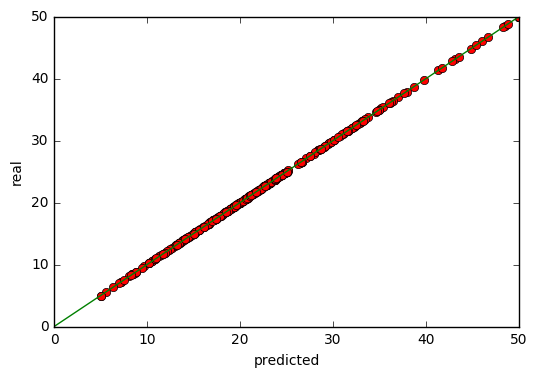

In [35]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# Plot outputs
%matplotlib inline
pl.plot(y_train_hat, y_train,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

# Usando sklearn

In [34]:
from sklearn.linear_model import Ridge
import numpy as np 

clf=Ridge(alpha=0.01,fit_intercept=False)
clf.fit(phi_X_train,y_train) 

clf.coef_

array([[  3.88232754e-05,  -1.13108898e-07,   4.05775441e-08,
          3.00156356e-08,   3.78490180e-06,  -1.96277083e-05,
          4.99665355e-06,   5.46052069e-09,  -1.54017292e-06,
          3.14487439e-07,  -1.38329561e-08,  -1.17201098e-06,
          1.21935282e-08,  -6.16277778e-07,   9.99998804e-01]])

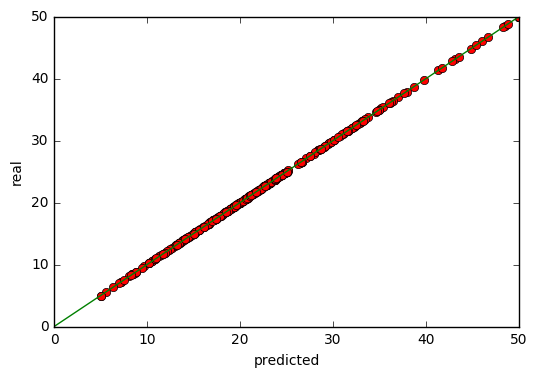

In [36]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# Plot outputs
%matplotlib inline
pl.plot(y_train_hat, y_train,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

Expandiendo los atributos con funciones base polinomiales
Ya estan implementada la funcion de expansión de polinomios 
solo es hacer la funcion para poder pasar ese atributo como tal. 

# Seleccionando los atributos más importantes

In [39]:
print (X_train.shape)
print (type(X_train))

(404, 14)
<type 'numpy.ndarray'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4ae53ce10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd4a8acff50>]], dtype=object)

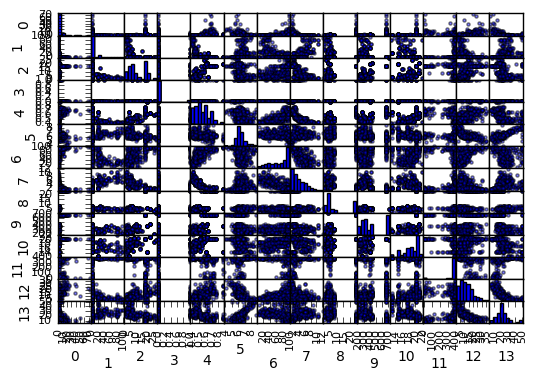

In [43]:
import pandas as pd
import numpy as np 
from pandas.tools.plotting import scatter_matrix

X_train_pandas= pd.DataFrame(X_train)

scatter_matrix(X_train_pandas)
